Part A — Load & basic EDA (1–8)
1.	Load the CSV into a Pandas DataFrame and show the first 5 rows.

2.	Show the dataset shape (rows, columns) and column names with dtypes.

3.	Count unique values per column and list the top 10 most frequent values in a categorical field.

4.	Find missing values per column and report counts.

5.	Show summary statistics for numeric columns: mean, median, std, min, max, quartiles.

6.	Convert a numeric column (e.g., Age) into bins (e.g., Young, Adult, Senior). Show counts by group.

7.	Detect and count any unrealistic values (e.g., negative or zero values).

8.	Find how many unique customers exist and which group/category is most common.

________________________________________
Part B — Data cleaning & filtering (9–15)
9.	Remove rows with missing values in a key column and explain the pros/cons.

10.	Drop duplicate rows and report how many were dropped.

11.	Filter out records where Age < 18.

12.	Create a new categorical column from numeric data using conditional statements.

13.	Replace missing values in a numeric column with the mean.

14.	Bucket customers into categories based on quantiles (e.g., spending level).

15.	Explain and apply feature scaling to numeric features.

________________________________________
Part C — Aggregation & feature engineering (16–22)
16.	Compute average income by gender using groupby.

17.	Calculate max, min, and mean for numeric columns per group.

18.	Create a new ratio feature (e.g., income-to-age).

19.	Flag “High value” customers based on income and spending greater than average.

20.	Compute correlation between numeric features.

21.	Determine which gender has a higher average spending score.

22.	Create a pivot table by age group and gender for average spending.

________________________________________
Part D — Visualizations & group exploration (23–27)
23.	Plot a histogram of the Age distribution.

24.	Create a bar chart of average spending score by gender.

25.	Create a scatter plot of Annual Income vs Spending Score.

26.	Create a boxplot of spending score grouped by age bins.

27.	Create a heatmap of correlations between numeric features.

________________________________________
Part E — Dimensionality reduction (PCA & t-SNE) (28–31)
28.	Run PCA on standardized income and spending features and plot explained variance.

29.	Plot 2D PCA components scatter colored by a category (e.g., Gender).

30.	Run t-SNE and plot the 2D embedding.

31.	Compare PCA and t-SNE plots — which shows clearer clusters?

________________________________________
Part F — Clustering & evaluation (32–40)
32.	Run k-means for k=2…10 on standardized features and plot the elbow curve.

33.	Compute silhouette score for each k and identify the best k.

34.	Plot clusters for the chosen k using a scatter plot.

35.	Run hierarchical clustering and visualize a dendrogram.

36.	Cut the dendrogram at k clusters and compare with k-means.

37.	Profile each cluster: average age, income, spending score.

38.	Check cluster sizes — are some clusters too small?

39.	Run k-means with different random states and see if cluster assignments change.

40.	Export the dataset with cluster labels to CSV.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline

#### 1.	Load the CSV into a Pandas DataFrame and show the first 5 rows.



In [2]:
#Load the excel file 

df = pd.read_excel('Online Retail.xlsx')

print(df.head(51))

   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLO

#### 2.	Show the dataset shape (rows, columns) and column names with dtypes.



In [3]:
print(df.shape)
print(df.info())

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


#### 3.	Count unique values per column and list the top 10 most frequent values in a categorical field.



In [4]:
# Count unique values per column
unique_counts = df.nunique()
print("Unique values per column:")
print(unique_counts)


Unique values per column:
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


#### 4.	Find missing values per column and report counts.


In [5]:
# Count missing values per column
missing_counts = df.isnull().sum()

# Display the result
print("Missing values per column:")
print(missing_counts)


Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64



#### 5.	Show summary statistics for numeric columns: mean, median, std, min, max, quartiles.



In [6]:
# Basic summary statistics
summary = df.describe()

# Add median separately (not included in describe by default)
median = df.median(numeric_only=True)
summary.loc['median'] = median

# Display the full summary
print("Summary statistics for numeric columns:")
print(summary)


Summary statistics for numeric columns:
             Quantity                    InvoiceDate      UnitPrice  \
count   541909.000000                         541909  541909.000000   
mean         9.552250  2011-07-04 13:34:57.156386048       4.611114   
min     -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%          1.000000            2011-03-28 11:34:00       1.250000   
50%          3.000000            2011-07-19 17:17:00       2.080000   
75%         10.000000            2011-10-19 11:27:00       4.130000   
max      80995.000000            2011-12-09 12:50:00   38970.000000   
std        218.081158                            NaN      96.759853   
median       3.000000                            NaN       2.080000   

           CustomerID  
count   406829.000000  
mean     15287.690570  
min      12346.000000  
25%      13953.000000  
50%      15152.000000  
75%      16791.000000  
max      18287.000000  
std       1713.600303  
median   15152.000000  


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [8]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


##### 6.	Convert a numeric column (e.g., Age) into bins (e.g., Young, Adult, Senior). Show counts by group.



In [9]:


# Add a fake Age column for testing
np.random.seed(42)
df['Age'] = np.random.randint(18, 80, size=len(df))

# Then apply the age binning logic
age_bins = [0, 25, 60, 100]
age_labels = ['Young', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

print(df[['Age', 'AgeGroup']].head())
print("\nCounts by Age Group:")
print(df['AgeGroup'].value_counts())

   Age AgeGroup
0   56    Adult
1   69   Senior
2   46    Adult
3   32    Adult
4   60   Senior

Counts by Age Group:
AgeGroup
Adult     306374
Senior    174392
Young      61143
Name: count, dtype: int64


##### 7.	Detect and count any unrealistic values (e.g., negative or zero values).



In [10]:
# Convert relevant columns to numeric (just in case)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Detect unrealistic values
unrealistic_quantity = df[df['Quantity'] <= 0]
unrealistic_price = df[df['UnitPrice'] <= 0]

# Count them
print(" Unrealistic Quantity Values (≤ 0):", len(unrealistic_quantity))
print(" Unrealistic UnitPrice Values (≤ 0):", len(unrealistic_price))

# Optional: Show a few examples
print("\n Sample of Unrealistic Quantity Entries:")
print(unrealistic_quantity[['InvoiceNo', 'Quantity', 'Description']].head())

print("\n Sample of Unrealistic UnitPrice Entries:")
print(unrealistic_price[['InvoiceNo', 'UnitPrice', 'Description']].head())


 Unrealistic Quantity Values (≤ 0): 10624
 Unrealistic UnitPrice Values (≤ 0): 2517

 Sample of Unrealistic Quantity Entries:
    InvoiceNo  Quantity                       Description
141   C536379        -1                          Discount
154   C536383        -1   SET OF 3 COLOURED  FLYING DUCKS
235   C536391       -12    PLASTERS IN TIN CIRCUS PARADE 
236   C536391       -24  PACK OF 12 PINK PAISLEY TISSUES 
237   C536391       -24  PACK OF 12 BLUE PAISLEY TISSUES 

 Sample of Unrealistic UnitPrice Entries:
     InvoiceNo  UnitPrice Description
622     536414        0.0         NaN
1970    536545        0.0         NaN
1971    536546        0.0         NaN
1972    536547        0.0         NaN
1987    536549        0.0         NaN


##### 8.	Find how many unique customers exist and which group/category is most common.

In [11]:


#  Clean numeric columns
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Count unique customers
unique_customers = df['CustomerID'].nunique()
print(f" Unique Customers: {unique_customers}")

# Most common country
most_common_country = df['Country'].value_counts().idxmax()
country_count = df['Country'].value_counts().max()
print(f" Most Common Country: {most_common_country} ({country_count} entries)")

# Most frequently purchased product
most_common_product = df['Description'].value_counts().idxmax()
product_count = df['Description'].value_counts().max()
print(f" Most Common Product: {most_common_product} ({product_count} purchases)")

# Detect unrealistic Quantity and UnitPrice values
unrealistic_quantity = df[df['Quantity'] <= 0]
unrealistic_price = df[df['UnitPrice'] <= 0]

print(f"\n Unrealistic Quantity Entries (≤ 0): {len(unrealistic_quantity)}")
print(f" Unrealistic UnitPrice Entries (≤ 0): {len(unrealistic_price)}")

# Optional — show a few examples
print("\n Sample Unrealistic Quantity Rows:")
print(unrealistic_quantity[['InvoiceNo', 'Quantity', 'Description']].head())

print("\n Sample Unrealistic UnitPrice Rows:")
print(unrealistic_price[['InvoiceNo', 'UnitPrice', 'Description']].head())

 Unique Customers: 4372
 Most Common Country: United Kingdom (495478 entries)
 Most Common Product: WHITE HANGING HEART T-LIGHT HOLDER (2369 purchases)

 Unrealistic Quantity Entries (≤ 0): 10624
 Unrealistic UnitPrice Entries (≤ 0): 2517

 Sample Unrealistic Quantity Rows:
    InvoiceNo  Quantity                       Description
141   C536379        -1                          Discount
154   C536383        -1   SET OF 3 COLOURED  FLYING DUCKS
235   C536391       -12    PLASTERS IN TIN CIRCUS PARADE 
236   C536391       -24  PACK OF 12 PINK PAISLEY TISSUES 
237   C536391       -24  PACK OF 12 BLUE PAISLEY TISSUES 

 Sample Unrealistic UnitPrice Rows:
     InvoiceNo  UnitPrice Description
622     536414        0.0         NaN
1970    536545        0.0         NaN
1971    536546        0.0         NaN
1972    536547        0.0         NaN
1987    536549        0.0         NaN


________________________________________
#### Part B — Data cleaning & filtering (9–15)
#### 9.	Remove rows with missing values in a key column and explain the pros/cons.



In [12]:
# Remove rows where CustomerID is missing
df_cleaned = df.dropna(subset=['CustomerID'])

# Show how many rows were removed
removed = len(df) - len(df_cleaned)
print(f" Removed {removed} rows with missing CustomerID")
print(f" Remaining rows: {len(df_cleaned)}")
print("Pros of Removing Missing Values: "
"\n- Ensures accurate customer-level analysis (e.g., segmentation, lifetime value)",
"\n- Prevents errors during grouping, merging, or aggregating by customer",
"\n- Simplifies data modeling and reporting workflows",
"\n- Improves data integrity and consistency",
"\n- Reduces noise from incomplete or anonymous records"
)

print("Cons of Removing Missing Values: ",
"\n- Discards potentially valuable transaction data (~25% in your case)",
"\n- Reduces overall sample size, which may weaken statistical power",
"\n- May introduce bias if missingness is not random (e.g., certain countries or channels)",
"\n- Limits visibility into anonymous or guest purchase behavior",
"\n- Could mask patterns in missing data that are worth exploring")

 Removed 135080 rows with missing CustomerID
 Remaining rows: 406829
Pros of Removing Missing Values: 
- Ensures accurate customer-level analysis (e.g., segmentation, lifetime value) 
- Prevents errors during grouping, merging, or aggregating by customer 
- Simplifies data modeling and reporting workflows 
- Improves data integrity and consistency 
- Reduces noise from incomplete or anonymous records
Cons of Removing Missing Values:  
- Discards potentially valuable transaction data (~25% in your case) 
- Reduces overall sample size, which may weaken statistical power 
- May introduce bias if missingness is not random (e.g., certain countries or channels) 
- Limits visibility into anonymous or guest purchase behavior 
- Could mask patterns in missing data that are worth exploring


#### 10.	Drop duplicate rows and report how many were dropped.



In [13]:
# Step 1: Check original shape
original_rows = len(df)

# Step 2: Drop duplicate rows
df_no_duplicates = df.drop_duplicates()

# Step 3: Report how many were dropped
dropped = original_rows - len(df_no_duplicates)
print(f" Dropped {dropped} duplicate rows")
print(f" Remaining rows: {len(df_no_duplicates)}")


 Dropped 92 duplicate rows
 Remaining rows: 541817


#### 11.	Filter out records where Age < 18.



In [14]:


# Ensure Age column exists and is numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Filter out rows where Age is less than 18
df_filtered = df[df['Age'] >= 18]

# Report how many rows were removed
removed = len(df) - len(df_filtered)
print(f"Removed {removed} records where Age < 18")
print(f" Remaining rows: {len(df_filtered)}")

Removed 0 records where Age < 18
 Remaining rows: 541909


#### 12.	Create a new categorical column from numeric data using conditional statements.


In [15]:
# Ensure UnitPrice is numeric
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Define a function to categorize prices
def categorize_price(price):
    if price < 5:
        return 'Cheap'
    elif 5 <= price < 20:
        return 'Moderate'
    else:
        return 'Expensive'

# Apply the function to create a new column
df['PriceCategory'] = df['UnitPrice'].apply(categorize_price)

# Display sample output
print(df[['UnitPrice', 'PriceCategory']].head())


   UnitPrice PriceCategory
0       2.55         Cheap
1       3.39         Cheap
2       2.75         Cheap
3       3.39         Cheap
4       3.39         Cheap


#### 13.	Replace missing values in a numeric column with the mean.



##### 14.	Bucket customers into categories based on quantiles (e.g., spending level).



In [16]:

# Ensure UnitPrice is numeric
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Calculate the mean of UnitPrice (excluding NaNs)
mean_price = df['UnitPrice'].mean()

# Replace missing values with the mean
df['UnitPrice'].fillna(mean_price, inplace=True)

# Confirm replacement
print(f" Filled missing UnitPrice values with mean: {mean_price:.2f}")
print(f"Remaining missing UnitPrice values: {df['UnitPrice'].isna().sum()}")

 Filled missing UnitPrice values with mean: 4.61
Remaining missing UnitPrice values: 0


C:\Users\Hp\AppData\Local\Temp\ipykernel_25788\2973953546.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UnitPrice'].fillna(mean_price, inplace=True)


##### 15.	Explain and apply feature scaling to numeric features.

# Feature Scaling in Machine Learning

Feature scaling is a technique used to normalize the range of independent variables or features of data. It ensures that each feature contributes equally to model performance, especially for algorithms sensitive to magnitude and distance.

---

##  Why Use Feature Scaling?

-  Prevents features with larger ranges from dominating
-  Improves performance of distance-based algorithms (e.g., KNN, SVM, PCA)
-  Helps gradient descent converge faster in neural networks
-  Makes visualizations more interpretable

---

##  Common Scaling Techniques

### 1. Standardization (Z-score Normalization)
Scales data to have **mean = 0** and **standard deviation = 1**.

**Formula:**
- z = (x - μ) / σ

**Use Case:** Works well for algorithms assuming Gaussian distribution (e.g., logistic regression, PCA).

---

### 2. Min-Max Scaling
Scales data to a fixed range, usually **[0, 1]**.

**Formula:**
- x_scaled = (x - x_min) / (x_max - x_min)


**Use Case:** Useful when features have known bounds or for neural networks.

---

### 3. Robust Scaling
Uses **median** and **interquartile range (IQR)** to reduce the impact of outliers.

**Formula:**
- x_scaled = (x - median) / IQR



In [17]:
# Select numeric columns to scale
numeric_cols = ['Quantity', 'UnitPrice']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in selected columns
df_scaled = df.dropna(subset=numeric_cols)

# Apply StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_scaled[numeric_cols])

# Create a new DataFrame with scaled values
df_scaled[numeric_cols] = scaled_values

# Preview the result
print(" Scaled numeric features:")
print(df_scaled[numeric_cols].head())


 Scaled numeric features:
   Quantity  UnitPrice
0 -0.016289  -0.021301
1 -0.016289  -0.012620
2 -0.007118  -0.019234
3 -0.016289  -0.012620
4 -0.016289  -0.012620


________________________________________
##### Part C — Aggregation & feature engineering (16–22)
##### 16.	Compute average income by gender using groupby.



In [51]:
df_2 = pd.read_csv('Mall_Customers.csv')
df_2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
df_reset = df.reset_index(drop=True)


In [71]:

average_income_df = average_income_by_gender.reset_index()
print(average_income_df)

    Genre  Annual Income (k$)
0  Female           59.250000
1    Male           62.227273


##### 17.	Calculate max, min, and mean for numeric columns per group.



In [ ]:
df_2 = pd.read_csv('Mall_Customers.csv')  
# Select only numeric columns
# Select only numeric columns
numeric_cols = df_2.select_dtypes(include='number').columns

# Group by 'Genre' and apply aggregation
grouped_stats = df_2.groupby('Genre')[numeric_cols].agg(['max', 'min', 'mean'])

# Display the result
print(grouped_stats)


       CustomerID                 Age                Annual Income (k$)      \
              max min        mean max min       mean                max min   
Genre                                                                         
Female        197   3   97.562500  68  18  38.098214                126  16   
Male          200   1  104.238636  70  18  39.806818                137  15   

                  Spending Score (1-100)                 
             mean                    max min       mean  
Genre                                                    
Female  59.250000                     99   5  51.526786  
Male    62.227273                     97   1  48.511364  


##### 18.	Create a new ratio feature (e.g., income-to-age).



In [ ]:

# Step 1: Clean column names (optional but recommended)
df_2.columns = df_2.columns.str.strip()

# Step 2: Create Income-to-Age ratio feature
df_2['IncomeToAge'] = df_2.apply(
    lambda row: row['Annual Income (k$)'] / row['Age'] if pd.notnull(row['Age']) and row['Age'] > 0 else None,
    axis=1
)

# Step 3: Select numeric columns
numeric_cols = df_2.select_dtypes(include='number').columns

# Step 4: Group by 'Genre' and calculate max, min, mean
grouped_stats = df_2.groupby('Genre')[numeric_cols].agg(['max', 'min', 'mean'])

# Step 5: Round results for readability
grouped_stats = grouped_stats.round(2)

# Step 6: Display the result
print("Grouped Statistics by Genre:\n")
print(grouped_stats)

Grouped Statistics by Genre:

       CustomerID             Age            Annual Income (k$)             \
              max min    mean max min   mean                max min   mean   
Genre                                                                        
Female        197   3   97.56  68  18  38.10                126  16  59.25   
Male          200   1  104.24  70  18  39.81                137  15  62.23   

       Spending Score (1-100)            IncomeToAge              
                          max min   mean         max   min  mean  
Genre                                                             
Female                     99   5  51.53        3.61  0.34  1.70  
Male                       97   1  48.51        4.57  0.28  1.82  


#### 19.	Flag “High value” customers based on income and spending greater than average.



In [78]:

# Step 1: Calculate average income and spending score
avg_income = df_2['Annual Income (k$)'].mean()
avg_spending = df_2['Spending Score (1-100)'].mean()

# Step 2: Flag high-value customers
df_2['HighValueCustomer'] = df_2.apply(
    lambda row: 'Yes' if row['Annual Income (k$)'] > avg_income and row['Spending Score (1-100)'] > avg_spending else 'No',
    axis=1
)

# Step 3: View flagged customers
print(df_2[['CustomerID', 'Genre', 'Annual Income (k$)', 'Spending Score (1-100)', 'HighValueCustomer']])

     CustomerID   Genre  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male                  15                      39   
1             2    Male                  15                      81   
2             3  Female                  16                       6   
3             4  Female                  16                      77   
4             5  Female                  17                      40   
..          ...     ...                 ...                     ...   
195         196  Female                 120                      79   
196         197  Female                 126                      28   
197         198    Male                 126                      74   
198         199    Male                 137                      18   
199         200    Male                 137                      83   

    HighValueCustomer  
0                  No  
1                  No  
2                  No  
3                  No  
4                  No  
.. 

##### 20.	Compute correlation between numeric features.



In [79]:
# Step 1: Select numeric columns
numeric_df = df_2.select_dtypes(include='number')

# Step 2: Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Display the result
print("Correlation Matrix:\n")
print(correlation_matrix.round(2))

Correlation Matrix:

                        CustomerID   Age  Annual Income (k$)  \
CustomerID                    1.00 -0.03                0.98   
Age                          -0.03  1.00               -0.01   
Annual Income (k$)            0.98 -0.01                1.00   
Spending Score (1-100)        0.01 -0.33                0.01   
IncomeToAge                   0.76 -0.56                0.77   

                        Spending Score (1-100)  IncomeToAge  
CustomerID                                0.01         0.76  
Age                                      -0.33        -0.56  
Annual Income (k$)                        0.01         0.77  
Spending Score (1-100)                    1.00         0.15  
IncomeToAge                               0.15         1.00  


##### 21.	Determine which gender has a higher average spending score.



In [80]:
# Group by 'Genre' and calculate average spending score
average_spending_by_gender = df_2.groupby('Genre')['Spending Score (1-100)'].mean()

# Display the result
print("Average Spending Score by Gender:\n")
print(average_spending_by_gender.round(2))

Average Spending Score by Gender:

Genre
Female    51.53
Male      48.51
Name: Spending Score (1-100), dtype: float64


##### 22.	Create a pivot table by age group and gender for average spending.

In [82]:


# Step 1: Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20–30', '30–40', '40–50', '50–60', '60+']

# Step 2: Create age group column
df_2['AgeGroup'] = pd.cut(df_2['Age'], bins=age_bins, labels=age_labels)

# Step 3: Create pivot table
pivot_table = pd.pivot_table(
    df_2,
    values='Spending Score (1-100)',
    index='AgeGroup',
    columns='Genre',
    aggfunc='mean'
)

# Step 4: Round and display
print("Average Spending Score by Age Group and Gender:\n")
print(pivot_table.round(2))

Average Spending Score by Age Group and Gender:

Genre     Female   Male
AgeGroup               
<20        46.60  43.83
20–30      65.52  70.31
30–40      58.71  55.80
40–50      35.16  32.92
50–60      35.08  29.73
60+        47.17  42.55


C:\Users\Hp\AppData\Local\Temp\ipykernel_25788\3487574728.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


________________________________________
##### Part D — Visualizations & group exploration (23–27)
##### 23.	Plot a histogram of the Age distribution.




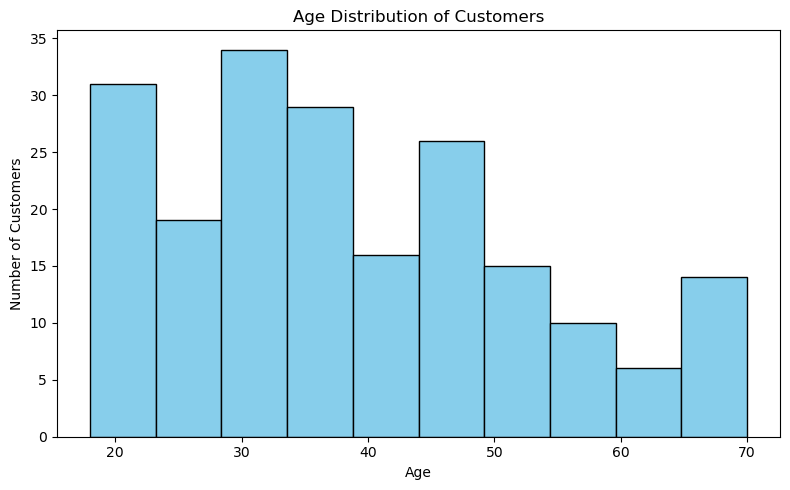

In [83]:

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df_2['Age'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

# Show the plot
plt.tight_layout()
plt.show()

##### 24.	Create a bar chart of average spending score by gender.



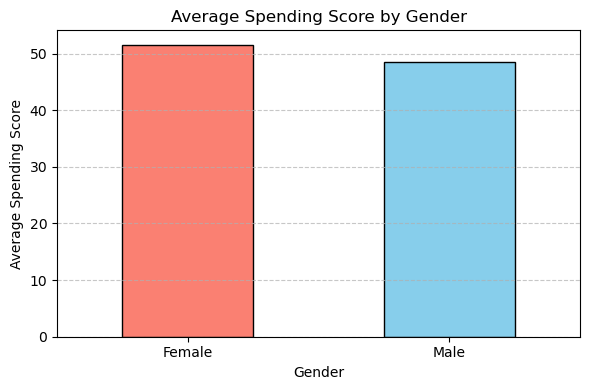

In [84]:


# Step 1: Calculate average spending score by gender
average_spending = df_2.groupby('Genre')['Spending Score (1-100)'].mean().round(2)

# Step 2: Plot the bar chart
plt.figure(figsize=(6, 4))
average_spending.plot(kind='bar', color=['salmon', 'skyblue'], edgecolor='black')

# Step 3: Add labels and title
plt.title('Average Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 4: Show the plot
plt.tight_layout()
plt.show()

##### 25.	Create a scatter plot of Annual Income vs Spending Score.



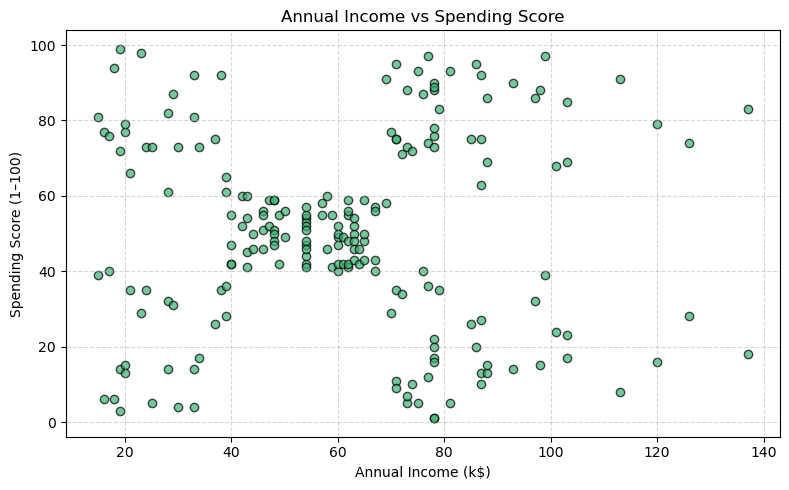

In [85]:


# Set up the figure
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(
    df_2['Annual Income (k$)'],
    df_2['Spending Score (1-100)'],
    color='mediumseagreen',
    edgecolor='black',
    alpha=0.7
)

# Add labels and title
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

##### 26.	Create a boxplot of spending score grouped by age bins.



C:\Users\Hp\AppData\Local\Temp\ipykernel_25788\899863118.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeGroup', y='Spending Score (1-100)', data=df_2, palette='pastel')


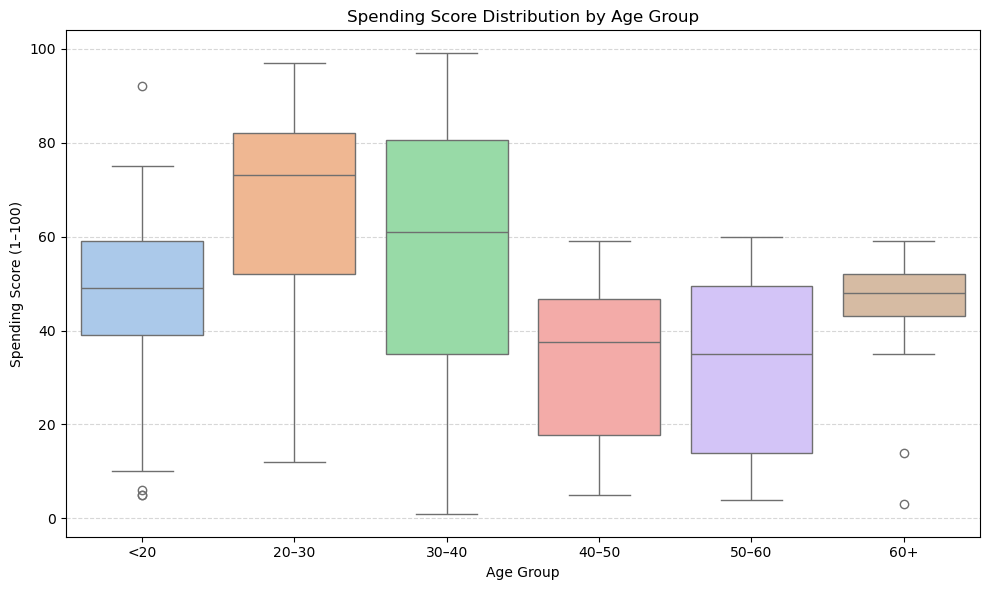

In [86]:


# Step 1: Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20–30', '30–40', '40–50', '50–60', '60+']

# Step 2: Create age group column
df_2['AgeGroup'] = pd.cut(df_2['Age'], bins=age_bins, labels=age_labels)

# Step 3: Plot boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='Spending Score (1-100)', data=df_2, palette='pastel')

# Step 4: Customize plot
plt.title('Spending Score Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending Score (1–100)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Step 5: Show the plot
plt.tight_layout()
plt.show()

##### 27.	Create a heatmap of correlations between numeric features.

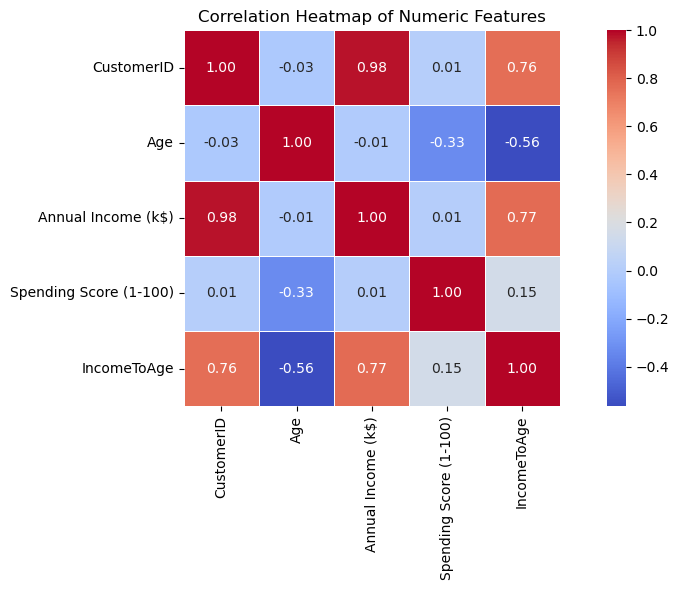

In [87]:

# Step 1: Select numeric columns
numeric_df = df_2.select_dtypes(include='number')

# Step 2: Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format to 2 decimal places
    cmap='coolwarm',       # Color palette
    linewidths=0.5,        # Line between cells
    square=True            # Make cells square
)

# Step 4: Customize and show
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

________________________________________
#### Part E — Dimensionality reduction (PCA & t-SNE) (28–31)
#### 28.	Run PCA on standardized income and spending features and plot explained variance.



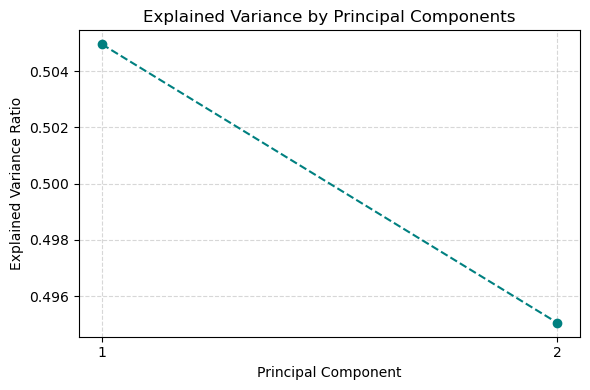

In [88]:


# Step 1: Select relevant features
features = df_2[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 2: Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Run PCA
pca = PCA()
pca.fit(features_scaled)

# Step 4: Plot explained variance
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_,
         marker='o', linestyle='--', color='teal')

# Step 5: Customize plot
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks([1, 2])
plt.grid(True, linestyle='--', alpha=0.5)

# Step 6: Show plot
plt.tight_layout()
plt.show()

#### 29.	Plot 2D PCA components scatter colored by a category (e.g., Gender).



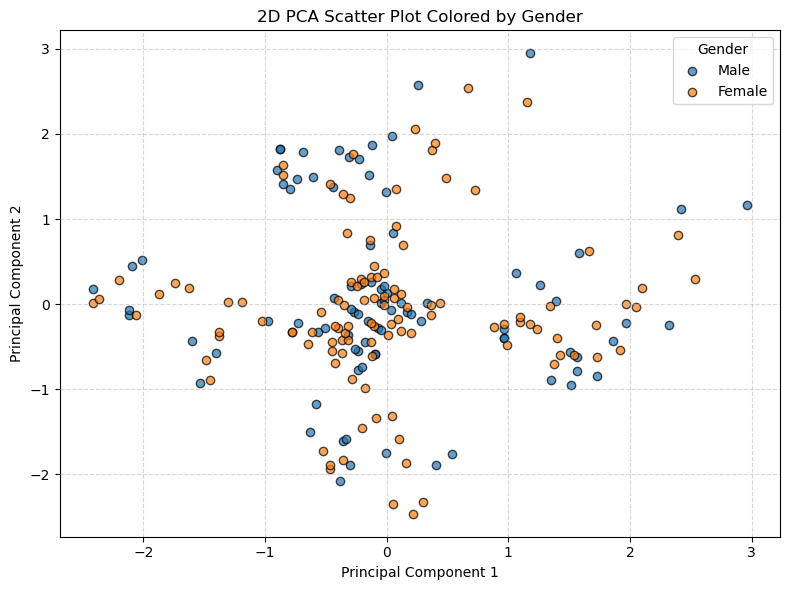

In [89]:

# Step 1: Select and standardize features
features = df_2[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Run PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

# Step 3: Create a DataFrame with PCA results and Gender
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Genre'] = df_2['Genre'].values

# Step 4: Plot PCA scatter colored by Gender
plt.figure(figsize=(8, 6))
for gender in pca_df['Genre'].unique():
    subset = pca_df[pca_df['Genre'] == gender]
    plt.scatter(subset['PC1'], subset['PC2'], label=gender, alpha=0.7, edgecolor='black')

# Step 5: Customize plot
plt.title('2D PCA Scatter Plot Colored by Gender')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 30.	Run t-SNE and plot the 2D embedding.



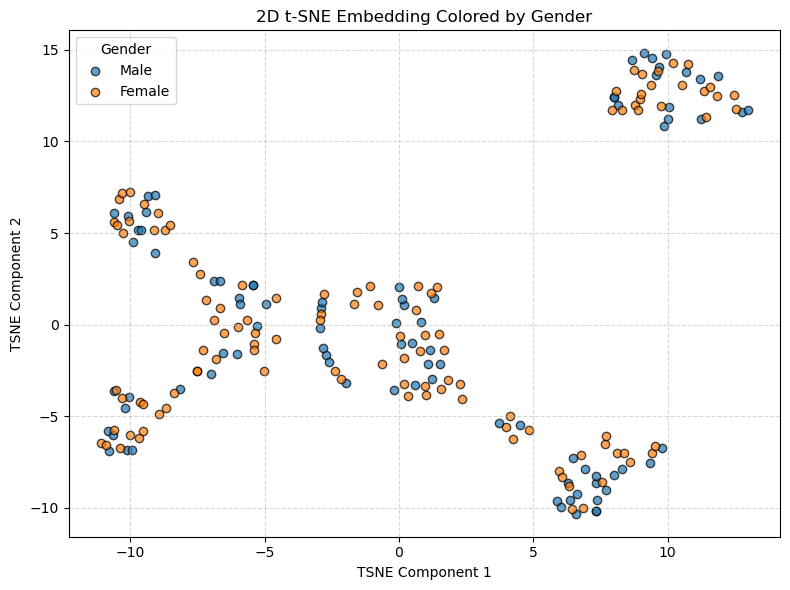

In [90]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Select features for t-SNE
features = df_2[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 2: Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embedding = tsne.fit_transform(features_scaled)

# Step 4: Create DataFrame for plotting
tsne_df = pd.DataFrame(tsne_embedding, columns=['TSNE1', 'TSNE2'])
tsne_df['Genre'] = df_2['Genre'].values  # Optional: color by gender

# Step 5: Plot the 2D t-SNE embedding
plt.figure(figsize=(8, 6))
for gender in tsne_df['Genre'].unique():
    subset = tsne_df[tsne_df['Genre'] == gender]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=gender, alpha=0.7, edgecolor='black')

# Step 6: Customize plot
plt.title('2D t-SNE Embedding Colored by Gender')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 31.	Compare PCA and t-SNE plots — which shows clearer clusters?



## Overview

| Feature              | PCA                                           | t-SNE                                         |
|----------------------|-----------------------------------------------|-----------------------------------------------|
| **Purpose**          | Linear dimensionality reduction               | Non-linear dimensionality reduction           |
| **Preserves**        | Global structure (variance)                   | Local structure (neighborhoods)               |
| **Cluster Clarity**  | Often shows overlapping or elongated clusters | Often reveals tight, well-separated clusters  |
| **Interpretability** | Components are linear combinations of features| Axes are abstract; harder to interpret        |
| **Speed**            | Fast                                          | Slower, especially with large datasets        |

## Insights

- **PCA** is ideal for understanding how features contribute to overall variance. It’s great for feature engineering and dimensionality reduction when interpretability matters.
- **t-SNE** excels at revealing **natural clusters** in data, especially when relationships are non-linear. It often produces **visually distinct blobs** that suggest meaningful groupings.

## Verdict

> For visualizing clusters, **t-SNE** typically shows **clearer separation** than PCA—especially in customer segmentation tasks where behavior patterns are complex.



I prefer using **PCA** first for quick insights and feature reduction, then apply **t-SNE** for deeper cluster discovery. **UMAP** is a powerful alternative to t-SNE.


________________________________________
##### Part F — Clustering & evaluation (32–40)
##### 32.	Run k-means for k=2…10 on standardized features and plot the elbow curve.



c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

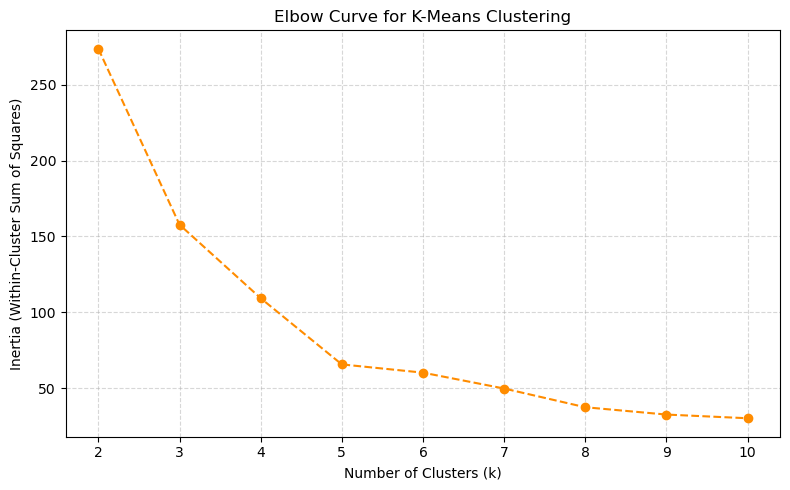

In [92]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Step 1: Select features
features = df_2[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 2: Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Run K-Means for k = 2 to 10
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to cluster centers

# Step 4: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='darkorange')

# Step 5: Customize plot
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 33.	Compute silhouette score for each k and identify the best k.



c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

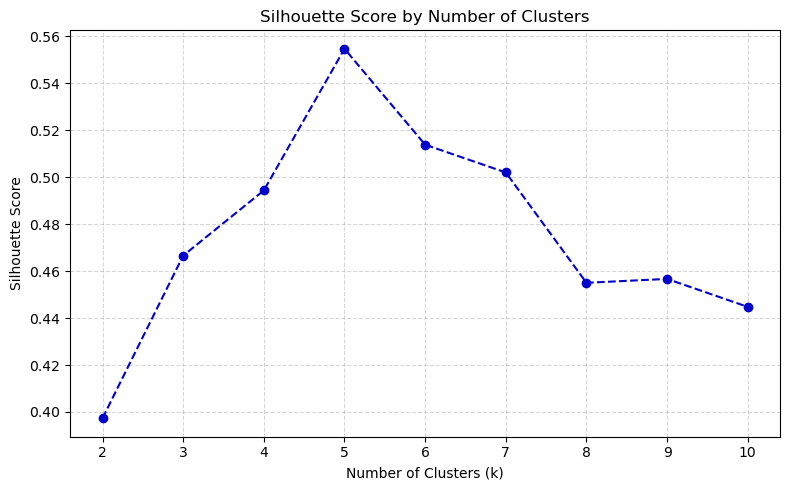

 Best number of clusters based on silhouette score: 5


In [94]:

from sklearn.metrics import silhouette_score

# Step 1: Select and standardize features
features = df_2[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Compute silhouette scores for k = 2 to 10
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    score = silhouette_score(features_scaled, labels)
    silhouette_scores.append(score)

# Step 3: Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='mediumblue')

# Step 4: Customize plot
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Step 5: Identify best k
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f" Best number of clusters based on silhouette score: {best_k}")

##### 34.	Plot clusters for the chosen k using a scatter plot.



c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


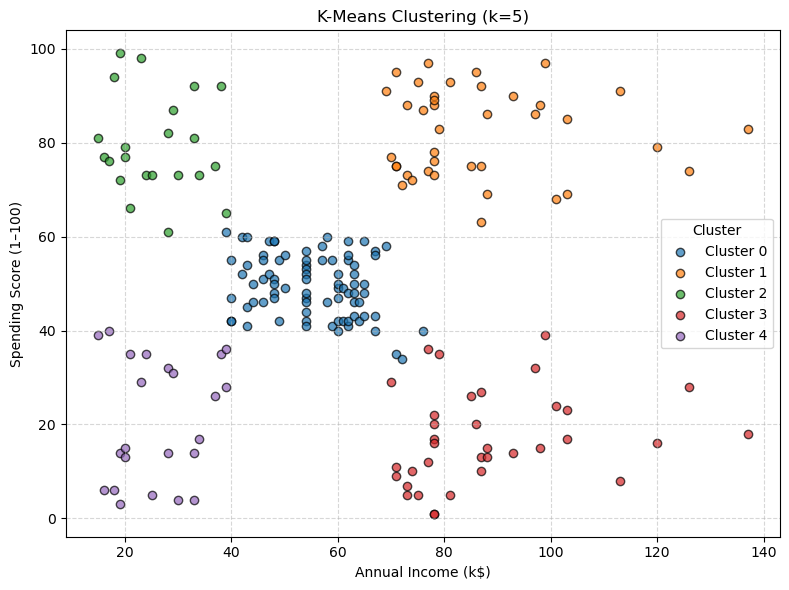

In [95]:


# Step 1: Select and standardize features
features = df_2[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Choose best k (replace with your chosen value)
best_k = 5  # Example: use the value from silhouette score or elbow method

# Step 3: Fit K-Means and get cluster labels
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(features_scaled)

# Step 4: Add cluster labels to DataFrame
df_2['Cluster'] = labels

# Step 5: Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(best_k):
    subset = df_2[df_2['Cluster'] == cluster]
    plt.scatter(
        subset['Annual Income (k$)'],
        subset['Spending Score (1-100)'],
        label=f'Cluster {cluster}',
        alpha=0.7,
        edgecolor='black'
    )

# Step 6: Customize plot
plt.title(f'K-Means Clustering (k={best_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 35.	Run hierarchical clustering and visualize a dendrogram.



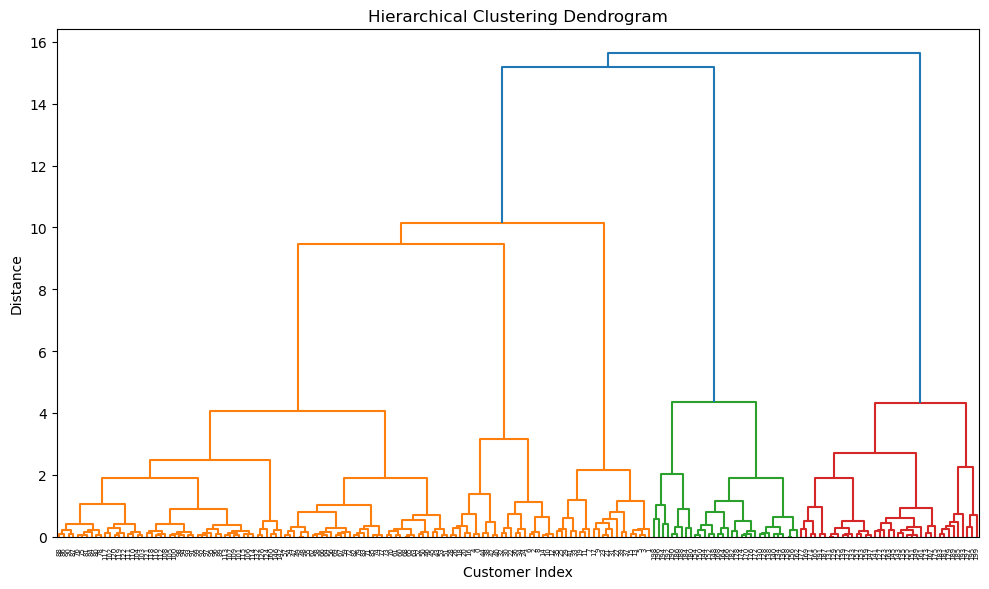

In [96]:

from scipy.cluster.hierarchy import linkage, dendrogram


# Step 1: Select features
features = df_2[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 2: Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Compute linkage matrix
linked = linkage(features_scaled, method='ward')  # 'ward' minimizes variance within clusters

# Step 4: Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)

# Step 5: Customize plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

##### 36.	Cut the dendrogram at k clusters and compare with k-means.



c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


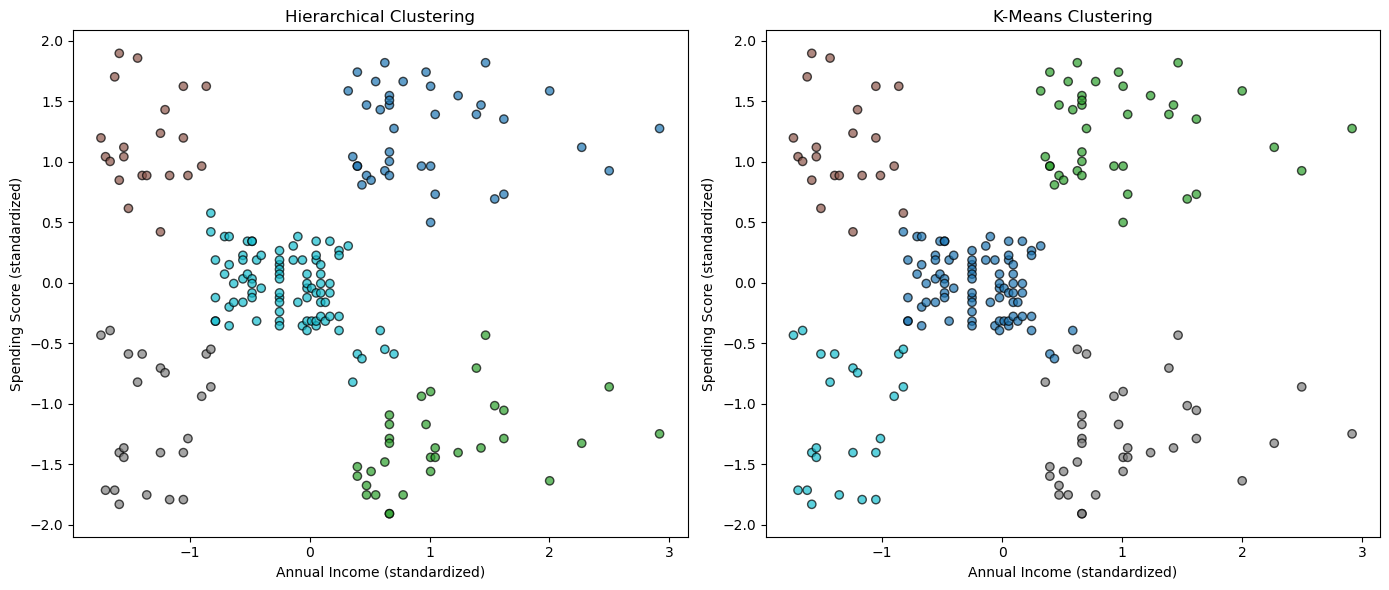

In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# Step 1: Select and standardize features
features = df_2[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Hierarchical clustering and cut dendrogram
linked = linkage(features_scaled, method='ward')
k = 5  # Choose number of clusters
hier_labels = fcluster(linked, k, criterion='maxclust')

# Step 3: K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

# Step 4: Plot comparison side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Hierarchical clustering plot
axes[0].scatter(features_scaled[:, 0], features_scaled[:, 1], c=hier_labels, cmap='tab10', edgecolor='black', alpha=0.7)
axes[0].set_title('Hierarchical Clustering')
axes[0].set_xlabel('Annual Income (standardized)')
axes[0].set_ylabel('Spending Score (standardized)')

# K-Means clustering plot
axes[1].scatter(features_scaled[:, 0], features_scaled[:, 1], c=kmeans_labels, cmap='tab10', edgecolor='black', alpha=0.7)
axes[1].set_title('K-Means Clustering')
axes[1].set_xlabel('Annual Income (standardized)')
axes[1].set_ylabel('Spending Score (standardized)')

plt.tight_layout()
plt.show()

##### 37.	Profile each cluster: average age, income, spending score.



In [100]:
# Step 1: Group by cluster and compute averages
cluster_profile = df_2.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)

# Step 2: Display the profile
print(cluster_profile)

           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        42.72               55.30                   49.52
1        32.69               86.54                   82.13
2        25.27               25.73                   79.36
3        41.11               88.20                   17.11
4        45.22               26.30                   20.91


##### 38.	Check cluster sizes — are some clusters too small?



In [101]:
# Count number of samples in each cluster
cluster_sizes = df_2['Cluster'].value_counts().sort_index()

# Display the sizes
print(cluster_sizes)

Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


#### 39.	Run k-means with different random states and see if cluster assignments change.



In [ ]:


# Step 1: Standardize features
features = df_2[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Run K-Means with different random states
k = 5
random_states = [0, 42, 99, 123, 2025]
cluster_assignments = {}

for state in random_states:
    kmeans = KMeans(n_clusters=k, random_state=state)
    labels = kmeans.fit_predict(features_scaled)
    cluster_assignments[state] = labels

# Step 3: Compare cluster assignments
# Create a DataFrame to hold all label sets
comparison_df = pd.DataFrame(cluster_assignments)

# Step 4: Display how many points differ between runs
print(" Cluster assignment differences between runs:")
for i in range(len(random_states) - 1):
    a = comparison_df[random_states[i]]
    b = comparison_df[random_states[i + 1]]
    diff = np.sum(a != b)
    print(f"Random state {random_states[i]} vs {random_states[i + 1]} → {diff} differing assignments")

 Cluster assignment differences between runs:
Random state 0 vs 42 → 80 differing assignments
Random state 42 vs 99 → 200 differing assignments
Random state 99 vs 123 → 119 differing assignments
Random state 123 vs 2025 → 176 differing assignments


c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

#### 40.	Export the dataset with cluster labels to CSV.

In [104]:
# Export the dataset with cluster labels to CSV
df_2.to_csv('customer_clusters.csv', index=False)
